In [86]:
import pandas as pd 
df_original = pd.read_csv("data/titanic/train.csv", sep=',')
df = pd.read_csv("data/titanic/train.csv", sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.shape

(891, 12)

In [88]:
dfTest = pd.read_csv("data/titanic/test.csv", sep=',')
dfTest.head()
dfTest.shape

(418, 11)

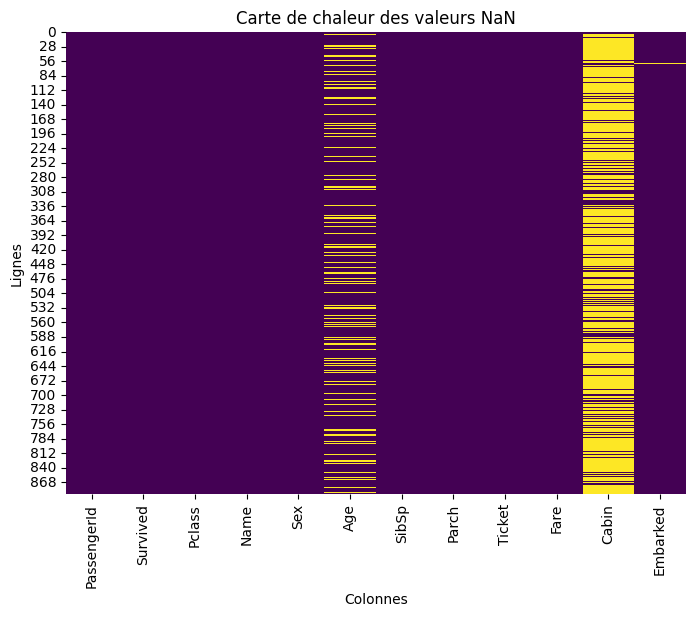

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de chaleur des valeurs NaN')
plt.xlabel('Colonnes')
plt.ylabel('Lignes')
plt.savefig("./images/heatmap.png")
plt.show()

In [90]:
#print the age % of NaN values
percentage_nan = df['Age'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'age' est de {percentage_nan:.2f}%")

Le pourcentage de valeurs NaN dans la colonne 'age' est de 19.87%


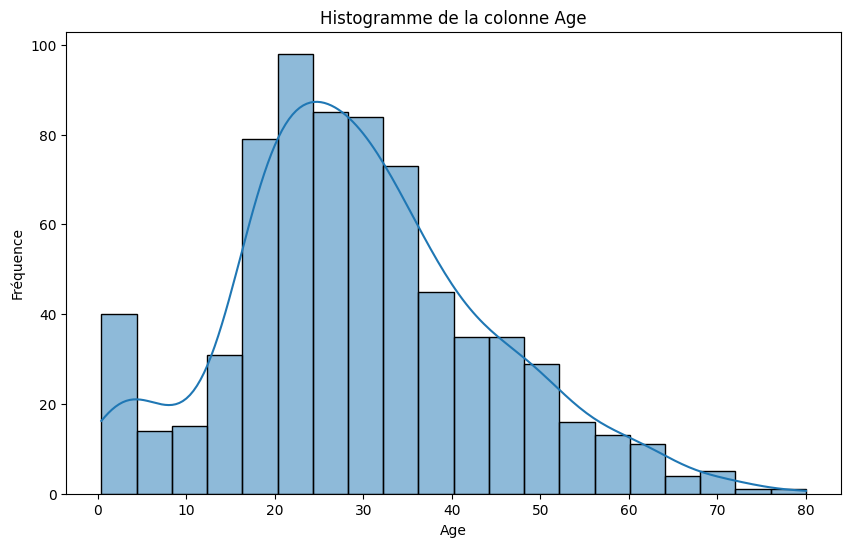

In [91]:
#print the histogram of the age column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
# Sauvegarde du graphique (optionnel)
plt.savefig('./images/age_histogram.png')
plt.show()

In [92]:
#print the median and the mean of the age column
print(f"La médiane de la colonne Age est : {df['Age'].mean():.1f}")
print(f"La moyenne de la colonne Age est : {df['Age'].median():.1f}")

La médiane de la colonne Age est : 29.7
La moyenne de la colonne Age est : 28.0


In [93]:
percentage_nan_cabin = df['Cabin'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de {percentage_nan_cabin:.2f}%")

Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de 77.10%


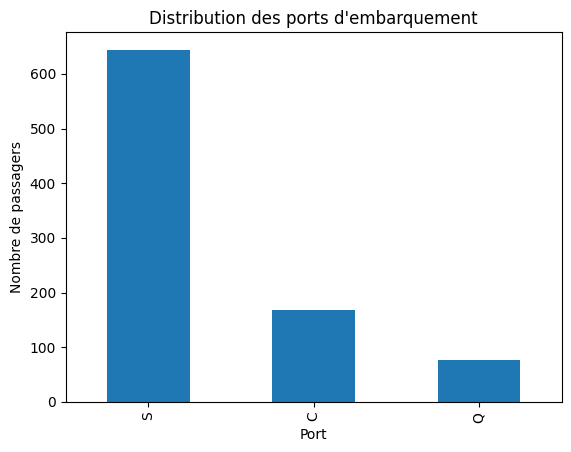

In [94]:
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribution des ports d\'embarquement')
plt.xlabel('Port')
plt.ylabel('Nombre de passagers')
plt.savefig("./images/portsEmbarquements.png")
plt.show()

In [95]:
# We will make the following changes to the data:

# If "Age" is missing for a given row, we assign 28 (median age).
# If "Embarked" is missing for a given line, we assign "S" (most common embarked).
# We will ignore "Cabin" as a variable. There are too many missing values ​​it wouldn't make sense to assign values ​​to it.
#apply the preprocessing like above
#verify your results

df['Age'].fillna(28, inplace=True)
df['Embarked'].fillna('S', inplace=True)
# df.drop(columns=['Cabin'], inplace=True)
missing_values = df.isnull().sum()
print("Valeurs manquantes après prétraitement :")
print(missing_values)

print("\nAperçu du DataFrame après prétraitement :")
print(df.head())

print("\nDistribution de 'Embarked' :")
print(df['Embarked'].value_counts())

print("\nStatistiques de 'Age' :")
print(df['Age'].describe())

Valeurs manquantes après prétraitement :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Aperçu du DataFrame après prétraitement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0

C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\2452356430.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(28, inplace=True)
C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\2452356430.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

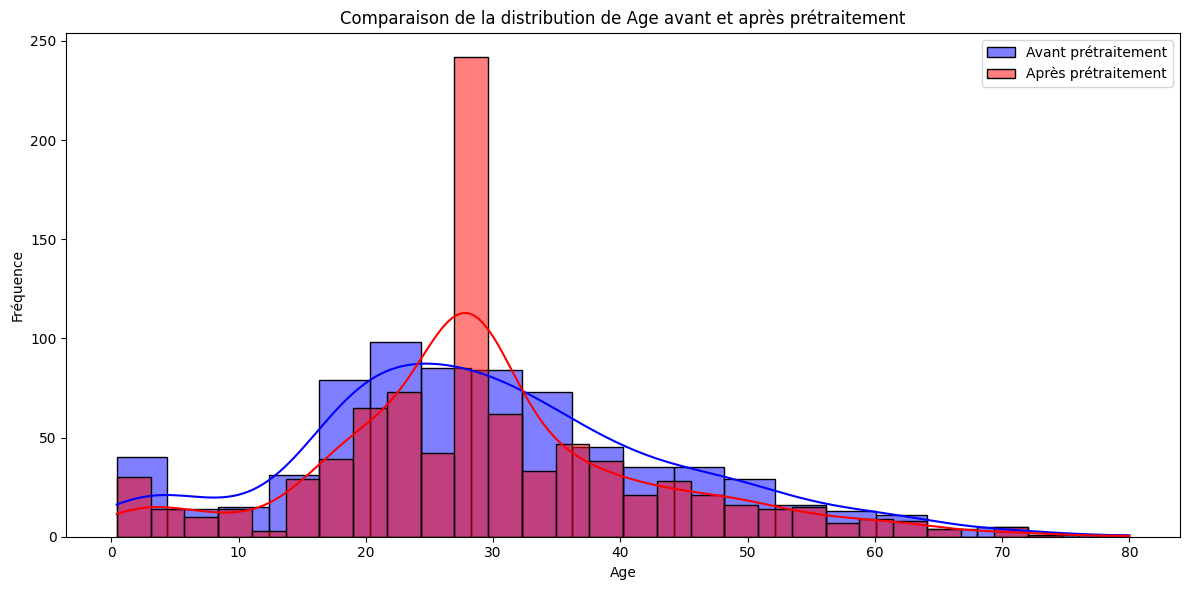

In [96]:
# Créer une seule figure
plt.figure(figsize=(12, 6))

# Tracer les deux histogrammes sur le même graphique
sns.histplot(data=df_original, x='Age', kde=True, color='blue', alpha=0.5, label='Avant prétraitement')
sns.histplot(data=df, x='Age', kde=True, color='red', alpha=0.5, label='Après prétraitement')

# Ajouter les détails du graphique
plt.title('Comparaison de la distribution de Age avant et après prétraitement')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.legend()

# Ajuster l'espacement
plt.tight_layout()

# Sauvegarder la figure
plt.savefig("./images/avant_et_apres_combine.png")

# Afficher la figure
plt.show()

In [97]:
df['TravelAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  TravelAlone  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            0  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S      

In [98]:
encoded_df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
print(encoded_df.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  TravelAlone  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500   NaN            0     False   
1  38.0      1      0          PC 17599  71.2833   C85            0     False   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN            1     False   
3  35.0      1      0            113803  53.1000  C123            0     False   
4  35.0      0      0            373450   8.0500   NaN            1     False   

   Pclass_3  Sex_male  Embarked_Q  Emb

In [99]:
df['Sex_male'] = (df['Sex'] == 'male').astype(int)
# columns_to_keep = ['Survived', 'Age', 'Fare', 'TravelAlone', 'Sex_male']
# df = df[columns_to_keep]
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  TravelAlone  Sex_male  
0      0         A/5 21171   7.2500   NaN        S            0         1  
1      0          PC 17599  71.2833   C85        C            0         0  
2      0  STON/O2. 3101282   7.9250   NaN        S            1         0  
3      0        

In [100]:
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Fare' in df.columns:
    if 'Pclass' in df.columns:
        df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)
    else:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)
if 'Cabin' in df.columns:
    df['Cabin_known'] = df['Cabin'].notna().astype(int)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
TravelAlone      0
Sex_male         0
Cabin_known      0
dtype: int64


C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\4231952714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\4231952714.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

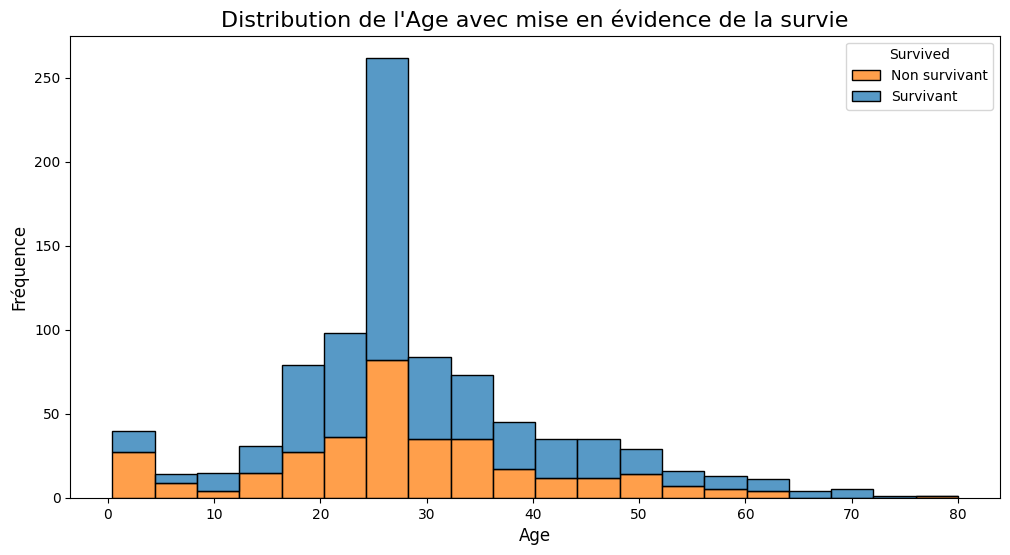

In [101]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Distribution de l\'Age avec mise en évidence de la survie', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend(title='Survived', labels=['Non survivant', 'Survivant'])
plt.savefig("./images/age_survie.png")
plt.show()

In [102]:
df['IsMinor'] = (df['Age'] < 16).astype(int)
print(df[['Age', 'IsMinor']].head())

    Age  IsMinor
0  22.0        0
1  38.0        0
2  26.0        0
3  35.0        0
4  35.0        0


In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone,Sex_male,Cabin_known,IsMinor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0


C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\3695137363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_class, x='Pclass', y='Survived', palette='viridis')


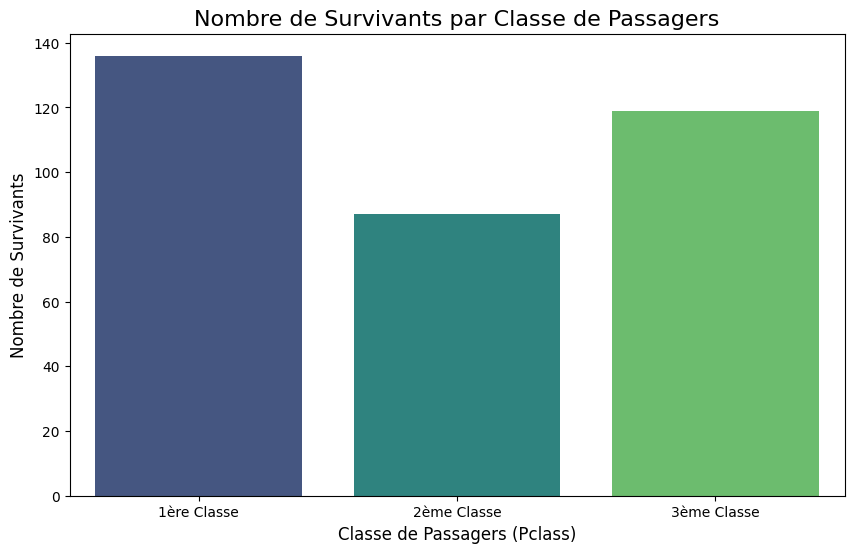

In [104]:
survivors_by_class = df.groupby('Pclass')['Survived'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=survivors_by_class, x='Pclass', y='Survived', palette='viridis')
plt.title('Nombre de Survivants par Classe de Passagers', fontsize=16)
plt.xlabel('Classe de Passagers (Pclass)', fontsize=12)
plt.ylabel('Nombre de Survivants', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['1ère Classe', '2ème Classe', '3ème Classe'])
plt.show()

C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\3392380487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_embarked, x='Embarked', y='Survived', palette='viridis')


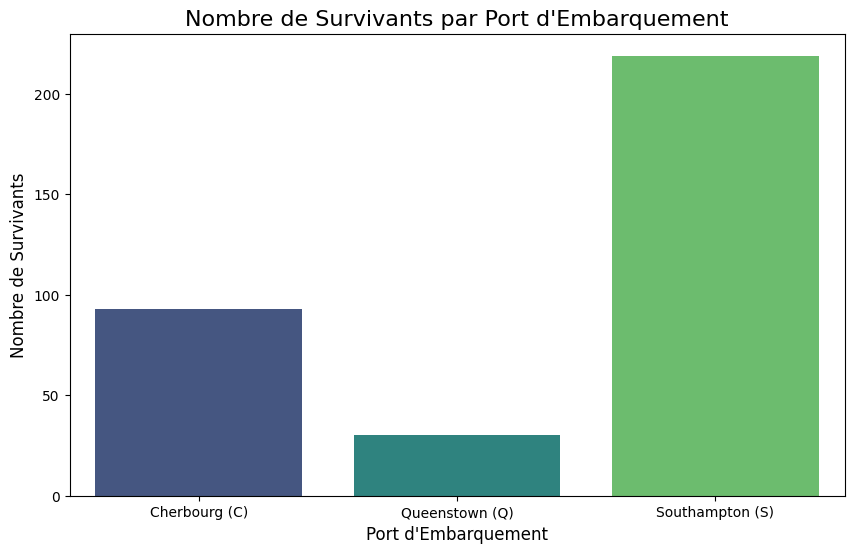

In [105]:
plt.figure(figsize=(10, 6))
survivors_by_embarked = df.groupby('Embarked')['Survived'].sum().reset_index()
sns.barplot(data=survivors_by_embarked, x='Embarked', y='Survived', palette='viridis')
plt.title('Nombre de Survivants par Port d\'Embarquement', fontsize=16)
plt.xlabel('Port d\'Embarquement', fontsize=12)
plt.ylabel('Nombre de Survivants', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\1790829335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_travel_alone, x='TravelAlone', y='Survived', palette='viridis')


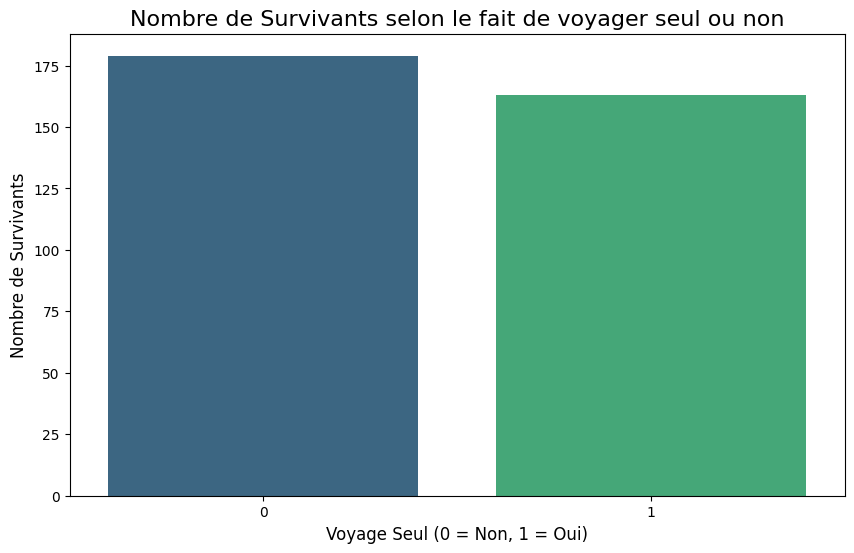

In [106]:
survivors_by_travel_alone = df.groupby('TravelAlone')['Survived'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=survivors_by_travel_alone, x='TravelAlone', y='Survived', palette='viridis')
plt.title('Nombre de Survivants selon le fait de voyager seul ou non', fontsize=16)
plt.xlabel('Voyage Seul (0 = Non, 1 = Oui)', fontsize=12)
plt.ylabel('Nombre de Survivants', fontsize=12)
plt.show()

C:\Users\Gaetan\AppData\Local\Temp\ipykernel_22092\2949799533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_gender, x='Sex', y='Survived', palette='viridis')


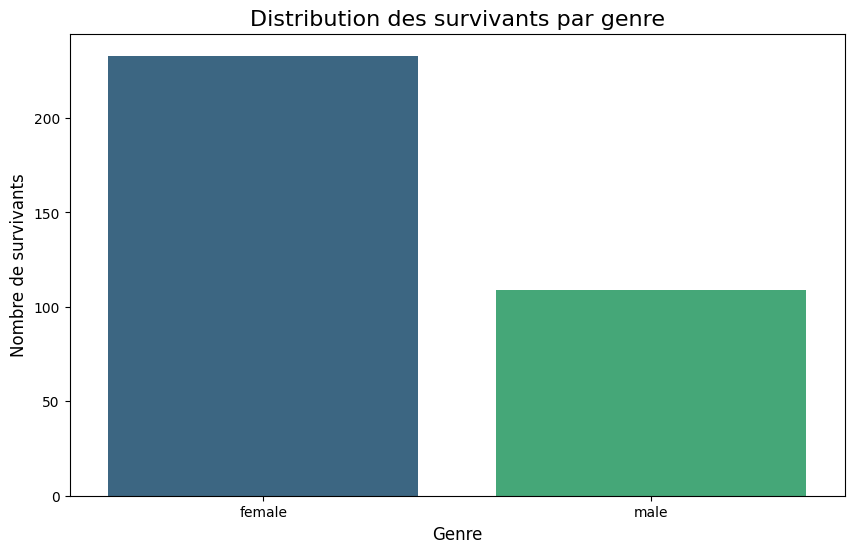

In [107]:
survivors_by_gender = df.groupby('Sex')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=survivors_by_gender, x='Sex', y='Survived', palette='viridis')
plt.title('Distribution des survivants par genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Nombre de survivants', fontsize=12)

plt.show()

In [108]:
print("Colonnes disponibles :", df.columns)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_columns].drop('Survived', axis=1)
y = df['Survived']
print("\nCaractéristiques (X) :")
print(X.columns)
print("\nForme de X :", X.shape)
print("\nForme de y :", y.shape)


Colonnes disponibles : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TravelAlone',
       'Sex_male', 'Cabin_known', 'IsMinor'],
      dtype='object')

Caractéristiques (X) :
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'TravelAlone',
       'Sex_male', 'Cabin_known', 'IsMinor'],
      dtype='object')

Forme de X : (891, 10)

Forme de y : (891,)


In [109]:
from sklearn.linear_model import LogisticRegression

# Instancier un estimateur LogisticRegression
estimator = LogisticRegression(random_state=42)

estimator = LogisticRegression(
    random_state=42,
    C=1.0,
    penalty='l2',
    solver='lbfgs',
    max_iter=100
)



In [110]:
print("Forme de X_preprocessed:", X_preprocessed.shape)
print("Nombre de noms de colonnes:", len(feature_names))
print("Noms de colonnes:", feature_names)


Forme de X_preprocessed: (891, 8)
Nombre de noms de colonnes: 8
Noms de colonnes: ['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']


In [111]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X_preprocessed_df = X_preprocessed_df.fillna(X_preprocessed_df.mean())
estimator = LogisticRegression(random_state=42)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_preprocessed_df, y)

selected_features_4 = X_preprocessed_df.columns[selector.support_].tolist()
print("Selected features (4):", selected_features_4)

selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X_preprocessed_df, y)
selected_features_8 = X_preprocessed_df.columns[selector.support_].tolist()
print("Selected features (8):", selected_features_8)


Selected features (4): ['Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_S']
Selected features (8): ['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']


C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

In [ ]:
df = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

if 'TravelAlone' not in df.columns:
    df['TravelAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

if 'IsMinor' not in df.columns:
    df['IsMinor'] = (df['Age'] < 16).astype(int)

print(df.columns)

X = df[['Age', 'Fare', 'TravelAlone', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']]
y = df['Survived']

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'TravelAlone', 'Sex_male', 'Cabin_known', 'IsMinor',
       'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')


In [ ]:
estimator = LogisticRegression(random_state=42)
selector = RFECV(estimator=estimator, 
                 step=1, 
                 cv=StratifiedKFold(5),
                 scoring='accuracy',
                 min_features_to_select=1)

selector = selector.fit(X, y)

print("Nombre optimal de caractéristiques :", selector.n_features_)
selected_features = X.columns[selector.support_].tolist()

C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Nombre optimal de caractéristiques : 10


C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

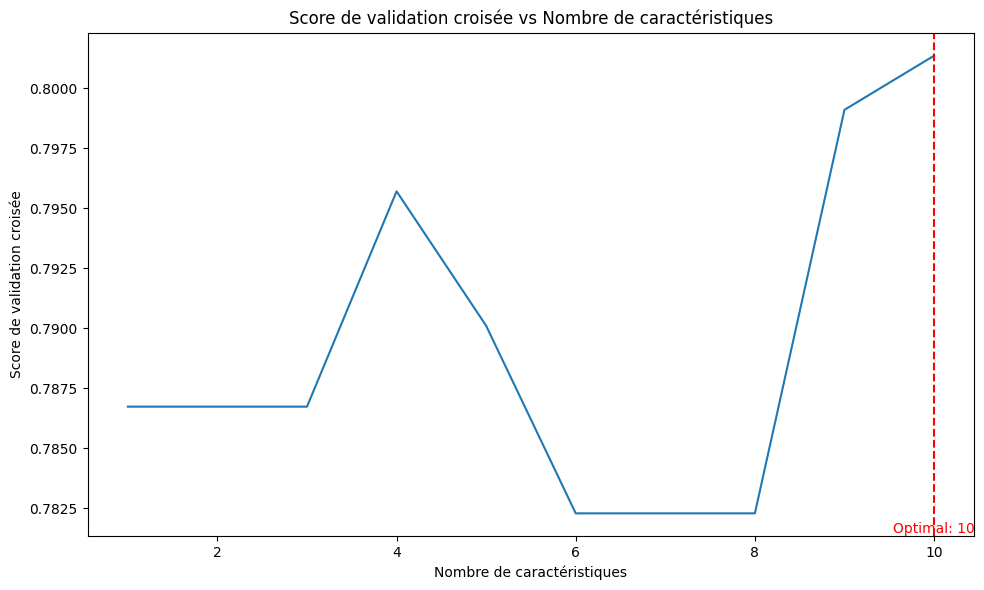

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('Score de validation croisée')
plt.title('Score de validation croisée vs Nombre de caractéristiques')

plt.axvline(x=selector.n_features_, color='red', linestyle='--')
plt.text(selector.n_features_, plt.ylim()[0], f'Optimal: {selector.n_features_}', 
         verticalalignment='bottom', horizontalalignment='center', color='red')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (712, 10)
Forme de X_test : (179, 10)
Forme de y_train : (712,)
Forme de y_test : (179,)


In [ ]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

print("Coefficients du modèle :", log_reg.coef_)

y_pred = log_reg.predict(X_test)

print("Prédictions :", y_pred[:10])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", report)



Coefficients du modèle : [[-0.01042797  0.00293535  0.34741198 -0.38157574 -1.67384248 -0.13186165
  -0.49153197 -1.26048414 -1.26048414  0.91369209]]
Prédictions : [0 0 0 1 1 1 1 0 1 1]
Précision du modèle : 0.7933
Matrice de confusion :
 [[91 14]
 [23 51]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


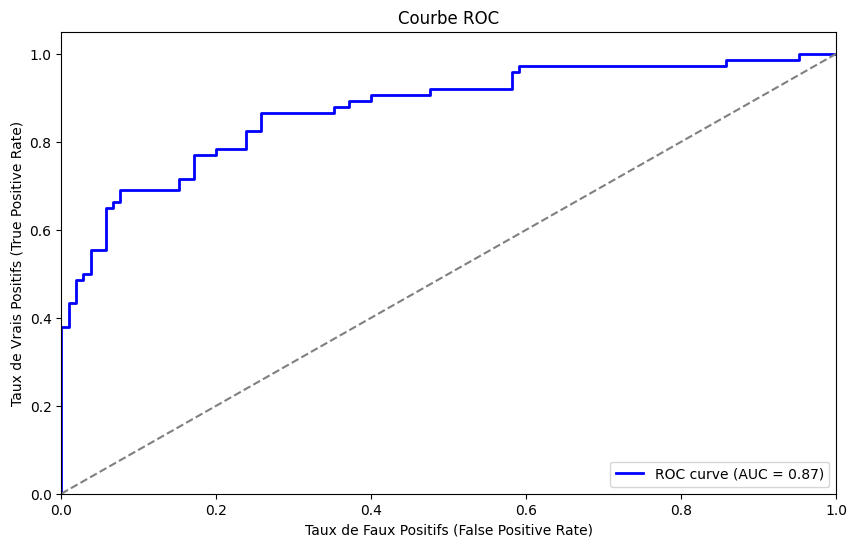

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", report)



Matrice de confusion :
 [[91 14]
 [23 51]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


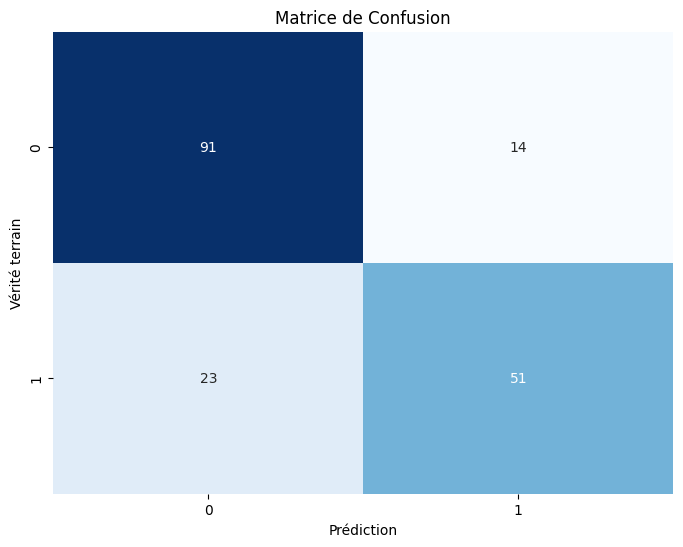

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.show()


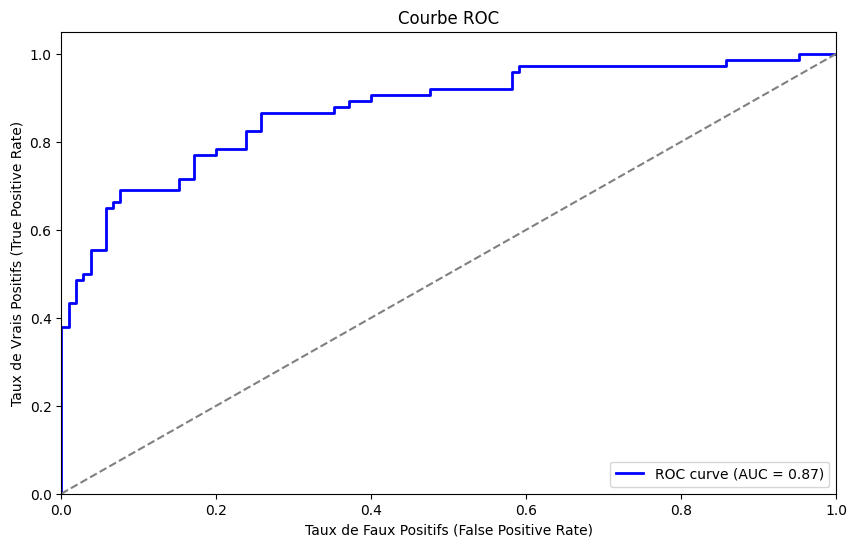

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = log_reg.predict_proba(X_test)[:, 1] 
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, log_loss, roc_auc_score

scoring = {
    'accuracy': 'accuracy',
    'neg_log_loss': 'neg_log_loss',
    'roc_auc': 'roc_auc'
}
log_reg = LogisticRegression(random_state=42)
cv_results = cross_validate(log_reg, X, y, cv=10, scoring=scoring, return_train_score=False)
mean_accuracy = cv_results['test_accuracy'].mean()
mean_log_loss = -cv_results['test_neg_log_loss'].mean()
mean_roc_auc = cv_results['test_roc_auc'].mean()

print(f"LogisticRegression average accuracy: {mean_accuracy:.3f}")
print(f"LogisticRegression average log_loss: {mean_log_loss:.3f}")
print(f"LogisticRegression average AUC: {mean_roc_auc:.3f}")


C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

LogisticRegression average accuracy: 0.800
LogisticRegression average log_loss: 0.455
LogisticRegression average AUC: 0.849


C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaetan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st